In [ ]:
#The below code is updated with extra features and the Davies-Bouldin Index is also reduced.

Davies-Bouldin Index: 3.7328
(Note: Lower values indicate better cluster separation)

Running t-SNE... this may take a moment.


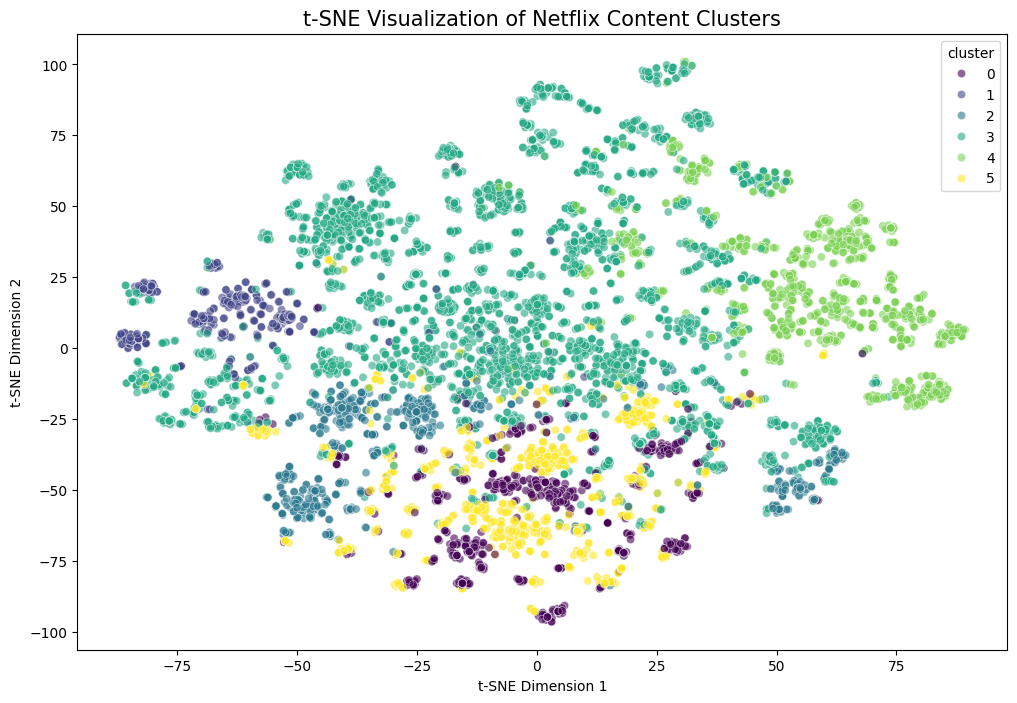

In [3]:

# Notebook: 7_Visualization_and_Evaluation.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score

# 1. Load the clustered data and the reduced matrix
df = pd.read_csv('final_clustered_netflix_data.csv')
X = np.load('matrix_reduced.npy')

# 2. Advanced Evaluation (Davies-Bouldin Index)
# Requirement: Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(X, df['cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")
print("(Note: Lower values indicate better cluster separation)")

# 3. Dimensionality Reduction using t-SNE for Visualization
# We use t-SNE to visualize the clusters we created in Step 6
print("\nRunning t-SNE... this may take a moment.")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 4. Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=df['cluster'],
    palette='viridis',
    legend='full',
    alpha=0.6
)

plt.title('t-SNE Visualization of Netflix Content Clusters', fontsize=15)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Create a temporary dataframe for visualization
vis_df = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1],
    'cluster': df['cluster'].astype(str), # Convert to string for discrete colors
    'title': df['title'],
    'listed_in': df['listed_in'] # Genres
})

# Create interactive scatter plot
fig = px.scatter(
    vis_df, x='x', y='y', 
    color='cluster', 
    hover_data=['title', 'listed_in'],
    title='Interactive t-SNE: What is in each cluster?',
    color_discrete_sequence=px.colors.qualitative.Prism
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

In [ ]:
#the above code is updated with extra features and the Davies-Bouldin Index is also reduced.

In [ ]:
# Notebook: 7_Visualization_and_Evaluation.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score

# 1. Load the clustered data and the reduced matrix
df = pd.read_csv('final_clustered_netflix_data.csv')
X = np.load('matrix_reduced.npy')

# 2. Advanced Evaluation (Davies-Bouldin Index)
# Requirement: Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(X, df['cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")
print("(Note: Lower values indicate better cluster separation)")

# 3. Dimensionality Reduction using t-SNE for Visualization
# We use t-SNE to visualize the clusters we created in Step 6
print("\nRunning t-SNE... this may take a moment.")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 4. Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=df['cluster'],
    palette='viridis',
    legend='full',
    alpha=0.6
)

plt.title('t-SNE Visualization of Netflix Content Clusters', fontsize=15)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()